In [29]:
%matplotlib inline
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [30]:
#Target search airlines
target_news = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@Nytimes")

#Counter
counter = 1

#Variable for holding sentiments
sentiments = []

#Loop through all tweets
for target in target_news:
   
    

    #Variable for oldest tweet
    oldest_tweet = None
    
    #Loop through 5 pages from home feed (total 100 tweets)
    for x in range(5):
    
    
        #Get all tweets from home feed
        public_tweets = api.user_timeline(target, max_id = oldest_tweet)
    
        #Loop through all tweets
        for tweet in public_tweets:
              
            #Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results ["pos"]
            neu = results ["neu"]
            neg = results["neg"]
            
            #Get oldest tweet id, subtract 1, and assign to oldest tweet
            oldest_tweet = tweet["id"] - 1
              
            #Add sentiments for each tweet into a list
            sentiments.append({"Source":target,
                           "Text":tweet["text"],
                           "Date":tweet["created_at"],
                           "Compound":compound,
                           "Positive":pos,
                           "Neutral":neu,
                           "Negative":neg,
                           "Tweets Ago":counter})
            counter += 1
        
        #Print text
        print (sentiments)        
   

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

[{'Source': '@BBC', 'Text': "Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶\n\nReginald D Hunter's S… https://t.co/K4ZHogg1lO", 'Date': 'Sat Jul 14 19:03:07 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 1.0, 'Negative': 0.0, 'Tweets Ago': 1}, {'Source': '@BBC', 'Text': "There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M", 'Date': 'Sat Jul 14 18:03:04 +0000 2018', 'Compound': 0.3818, 'Positive': 0.157, 'Neutral': 0.843, 'Negative': 0.0, 'Tweets Ago': 2}, {'Source': '@BBC', 'Text': '🎾\xa0Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc', 'Date': 'Sat Jul 14 17:32:50 +0000 2018', 'Compound': 0.8271, 'Positive': 0.372, 'Neutral': 0.628, 'Negative': 0.0, 'Tweets Ago': 3}, {'Source': '@BBC', 'Text': 'RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏\n\nThe German beats Serena William

In [31]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()
#.set_index('Source')

,Compound,Date,Negative,Neutral,Positive,Source,Text,Tweets Ago
0,0.0000,Sat Jul 14 19:03:07 +0000 2018,0.000,1.000,0.000,@BBC,"Tonight, @reginalddhunter takes a 2,000-mile m...",1
1,0.3818,Sat Jul 14 18:03:04 +0000 2018,0.000,0.843,0.157,@BBC,There's a clear difference in the way boys and...,2
2,0.8271,Sat Jul 14 17:32:50 +0000 2018,0.000,0.628,0.372,@BBC,🎾 Angelique Kerber beat seven-time champion Se...,3
3,0.6688,Sat Jul 14 16:23:10 +0000 2018,0.000,0.848,0.152,@BBC,RT @BBCSport: Angelique Kerber is the #wimbled...,4
4,0.6476,Sat Jul 14 16:03:05 +0000 2018,0.111,0.527,0.362,@BBC,"""We'll definitely keep in touch!"" 👋 *Immediat...",5


In [32]:
sentiments_pd.to_csv("NewsSentiment.csv", index = False)

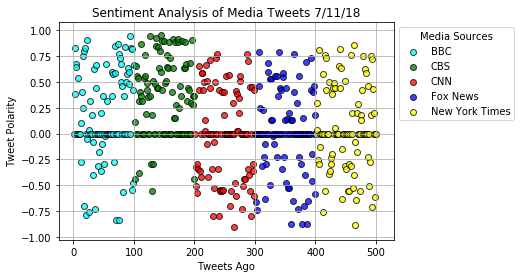

In [33]:
bbc = sentiments_pd.loc[sentiments_pd["Source"]=="@BBC", :]
cbs = sentiments_pd.loc[sentiments_pd["Source"]=="@CBS", :]
cnn = sentiments_pd.loc[sentiments_pd["Source"]=="@CNN", :]
fox = sentiments_pd.loc[sentiments_pd["Source"]=="@FoxNews", :]
nyt = sentiments_pd.loc[sentiments_pd["Source"]=="@Nytimes", :]

#bbc=sentiments_pd.loc[sentiments_pd.Source=='@BBC']['Compound']
plt.scatter(bbc["Tweets Ago"], bbc["Compound"], marker="o", facecolors="cyan", edgecolors="black",
            alpha=0.75,label="BBC")

plt.scatter(cbs["Tweets Ago"], cbs["Compound"], marker="o", facecolors="green", edgecolors="black",
           alpha=0.75,label="CBS")

plt.scatter(cnn["Tweets Ago"], cnn["Compound"], marker="o", facecolors="red", edgecolors="black",
           alpha=0.75,label="CNN")

plt.scatter(fox["Tweets Ago"], fox["Compound"], marker="o", facecolors="blue", edgecolors="black",
           alpha=0.75,label="Fox News")

plt.scatter(nyt["Tweets Ago"], nyt["Compound"], marker="o", facecolors="yellow", edgecolors="black",
           alpha=0.75,label="New York Times")


plt.title("Sentiment Analysis of Media Tweets 7/11/18")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)
lgnd=plt.legend(scatterpoints=1,bbox_to_anchor=(1,1),title="Media Sources")

@BBC
@CBS
@CNN
@FoxNews
@Nytimes


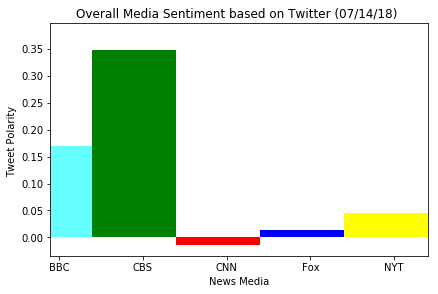

In [34]:
mean_sent = []
for target in target_news:
    print (target)
    tweet_compound = sentiments_pd.loc[sentiments_pd.Source==target]['Compound']
    mean_sent.append(np.mean(tweet_compound))
    
x_axis  =  [0,1,2,3,4]

plt.bar(0, mean_sent[0], facecolor='cyan', alpha=0.6, align="center",width=1.0)
plt.bar(1, mean_sent[1], facecolor='green', alpha=1.0, align="center",width=1.0)
plt.bar(2, mean_sent[2], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(3, mean_sent[3], facecolor='blue', alpha=1.0, align="center",width=1.0)
plt.bar(4, mean_sent[4], facecolor='yellow', alpha=1.0, align="center",width=1.0)

tick_locations = [value+0.1 for value in x_axis]
plt.xticks(tick_locations, ["BBC","CBS", "CNN","Fox","NYT" ], fontsize=10)

plt.xlim(0, 4.5)
plt.ylim(min(mean_sent)-0.02, max(mean_sent)+0.05)

plt.title("Overall Media Sentiment based on Twitter (07/14/18) ")
plt.xlabel("News Media")
plt.ylabel("Tweet Polarity ")
plt.tight_layout(pad=0.4, w_pad=0.8, h_pad=1.0)
plt.savefig("news_bar.png")
plt.show()